# Cross-validation and Simple Linear Regression

In this Notebook we are going to predict employee salaries from different employee characteristics (or features). We will use a simple supervised learning technique: linear regression. We want to build a simple model to determine how well Years Worked predicts an employee’s salary by importing and analyzing the data in salary.csv

#### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### Global settings

In [2]:
sns.set(rc={'figure.figsize':(12,8), 'axes.titleweight':'bold', 'axes.labelweight':'bold'}, font_scale = 2)

#### Importing the datasets

In [3]:
salary = pd.read_csv('../data/salary.csv')

In [4]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


#### Examining the data

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [6]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

Since there is a missing entry in the salary column, we will have to fill in the missing value with the mean and work with a clean dataset with no missing values.

In [7]:
salary=salary.fillna(salary.mean())

In [8]:
salary.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### Setting predictor and response variables 

In [ ]:
X = salary['yearsworked']
Y = salary['salary']

#### Splitting the data into a training and test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

#### Years Worked and Salary Histograms

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(X_train, kde=True, color='orange')
ax.set(xlabel='Years Worked', ylabel='Number of employees', title="Distribution of employees' Years Worked")

- This histogram shows a positive distribution of which there is a high number of workers between (0 - 5) years worked followed by (20 - 25) yearsworked, this graph is positively skewed with outliers as we approach 40 years worked 

[Text(0.5, 0, 'Salary'),
 Text(0, 0.5, 'Number of employees'),
 Text(0.5, 1.0, "Distribution of employees' Salary")]

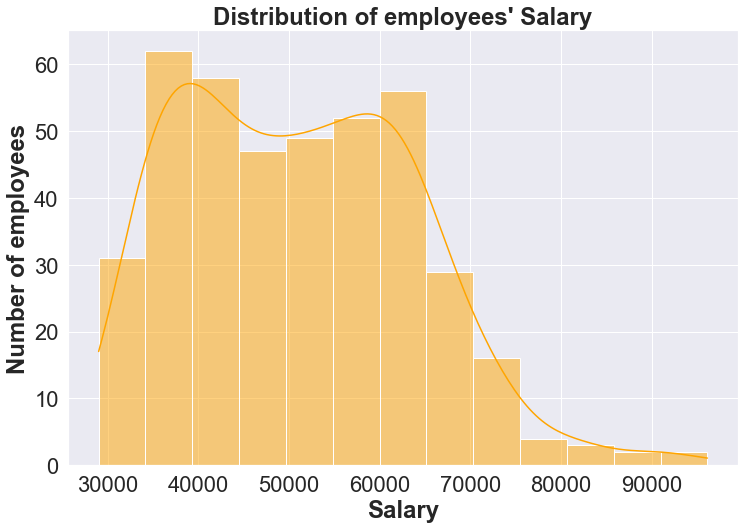

In [12]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(Y_train, kde=True, color='orange')
ax.set(xlabel='Salary', ylabel='Number of employees', title="Distribution of employees' Salary")

- This histogram shows a positively skewed distribution which is close to being a normal distribution, and it shows that most employees earn a salary between 35000 and 65000
- Both graphs are positively skewed.

We want to log tranform the salary variable since we can see that there are outliers, by doing so we will be able to have a better looking graph.

[Text(0.5, 0, 'Salary [Log]'),
 Text(0, 0.5, 'Number of employees'),
 Text(0.5, 1.0, "Distribution of employees' Salary")]

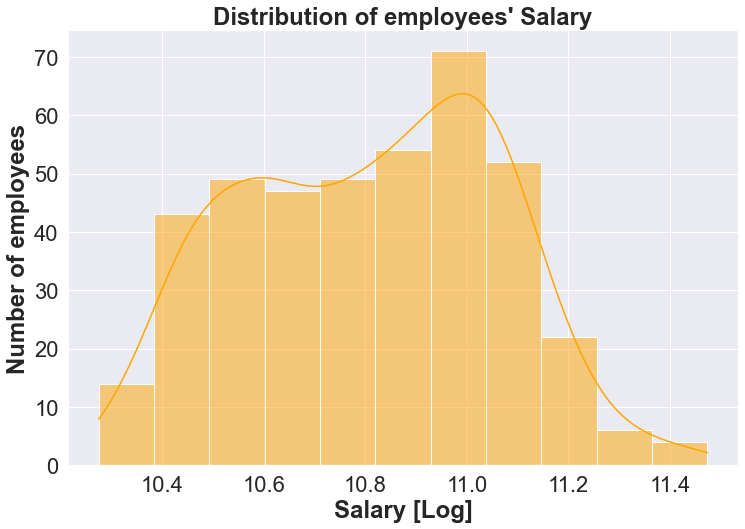

In [13]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(np.log(Y_train), kde=True, color='orange')
ax.set(xlabel='Salary [Log]', ylabel='Number of employees', title="Distribution of employees' Salary")

Now the distribution looks better.

#### Relationship between Salary and Years Worked regression plot

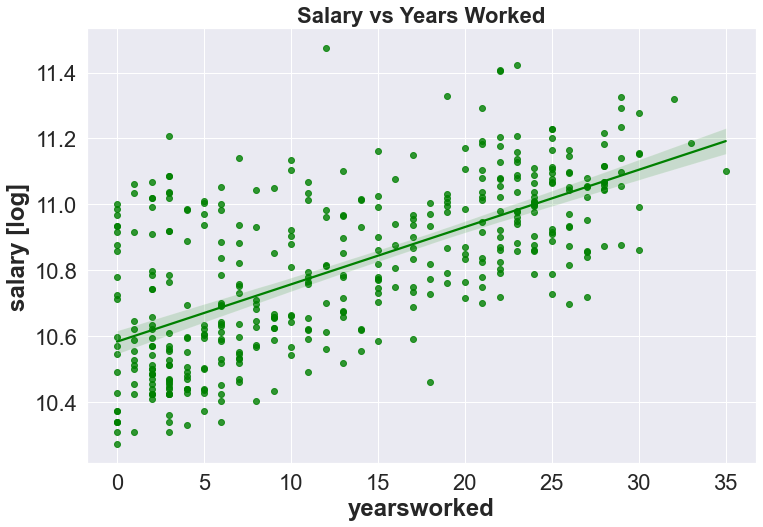

In [14]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X_train, y=np.log(Y_train), color='green')
_ = plt.title('Salary vs Years Worked', fontsize=22, weight='bold')
_ = plt.ylabel('salary [log]')

- Looking at this scatter plot we can see that there are extreme values above 90000 between 10-15 and 20-25 years worked. There is a linear relationship, the more years worked the higher the salary of an employee.
- Years Worked is a good predictor of Salary therefore it shows enough eligibility to be used in a model.

#### Simple Linear Regression for one predictor variable: Years worked

In [15]:
x_train = sm.add_constant(X_train)
const_model = sm.OLS(np.log(Y_train), x_train)
const_results = const_model.fit()
print(const_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     299.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           9.79e-51
Time:                        14:59:31   Log-Likelihood:                 96.208
No. Observations:                 411   AIC:                            -188.4
Df Residuals:                     409   BIC:                            -180.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5839      0.016    657.195      

Defining R-squared, P-value and Constant term
- R-squared, is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables
- The individual p-values tell us whether or not each predictor variable is statistically significant
- The constant term in regression analysis is the value at which the regression line crosses the y-axis, adding it ensures that the model will be unbiased, in other words, the mean of the residuals will be zero. By including a constant, one degree of freedom for error will be lost

OLS Regression Results evaluation
- Looking at the OLS regression results, it can be seen that the model significantly predicts the dependent variable salary since the amount of R-squared is 0.423 and a p-value of 0.000 to the predictor variable. This amount of R-squared is very significant since our dependent variable (salary) only depends on our predictor variable (years worked). We would have to add more dependent variables if we want to have a better R-squared. 
- 42.3% of variance in employees’ salaries is accounted for by the number of years they have worked

Unstandardized coefficient
- The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant. An unstandardized coefficient represents the amount of change in a dependent variable Y (salary) due to a change of 1 unit of independent variable X (yearsworked)
- The constant shows that even if an employee doesn’t have experience (years worked), they would still get a salary, which can be interpreted as a minimum wage for employees. Years worked shows that with one year experience of work your salary will increase by exp(0.0174) after we have normalized our data.

95% confidence intervals [0.025, 0.975]
- A 95% confidence interval would encompass all but the bottom 2.5% and the top 97.5% which correspond to probabilities of 0.025 and 0.975.

#### Expected salary for someone with 12 years’ work experience.


In [16]:
np.exp(const_results.predict(np.array([[1,12]])))

array([48649.80856116])

The expected salary for someone with 12 years'work experience is 48649.80

#### Expected salary for someone with 80 years’ work experience

In [17]:
np.exp(const_results.predict(np.array([[1,80]])))

array([158553.36342723])

The expected salary for someone with 80 years'work experience is 158553.36

- We can obviously already tell that people who are over 90 years of age are not fit to do any work, this can simply mean that we can refine our model to accomodate older people by having data that corresponds to old age salaries for better predictions.

#### Fitting our model to the test set without building a new model. Simply using our existing model to predict salaries in the test set.

In [18]:
x_test = sm.add_constant(X_test)
predictions = const_results.predict(x_test)

In [19]:
x_test['predicted salary']=np.exp(predictions)
x_test=x_test[['yearsworked','predicted salary']]
results = pd.concat([x_test,Y_test], axis=1)
results.head()

,yearsworked,predicted salary,salary
427,0,39494.359817,43500.0
243,28,64240.544269,54686.0
61,0,39494.359817,29500.0
403,2,40890.845265,55752.0
450,0,39494.359817,63500.0


#### To get the RMSE of the training and test sets we have to fit our x-train values into our model in order to have a preview of our model output.

In [20]:
predicted_salary=np.exp(const_results.predict(x_train))
X_train['predicted salary']=predicted_salary

#### Computing RMSE on both the test and training sets to help us check for overfitting and underfitting

In [21]:
print(f'test RMSE: {np.sqrt(metrics.mean_squared_error(Y_test, np.exp(predictions)))}')
print(f'train RMSE: {np.sqrt(metrics.mean_squared_error(Y_train, predicted_salary))}')

test RMSE: 10098.601007507421
train RMSE: 9926.346262220864


The root mean squared error. This measures the average difference between the predictions made by the model and the actual observations. The lower the RMSE, the more closely a model can predict the actual observations.

- There is a very small difference between the test and train RMSE, which means we can trust our model to predict the unknown values. The splits have worked well in preventing overfitting and underfitting. 

#### Computing a heatmap to show correlations

Text(0.5, 1.0, 'Correlations to Salary')

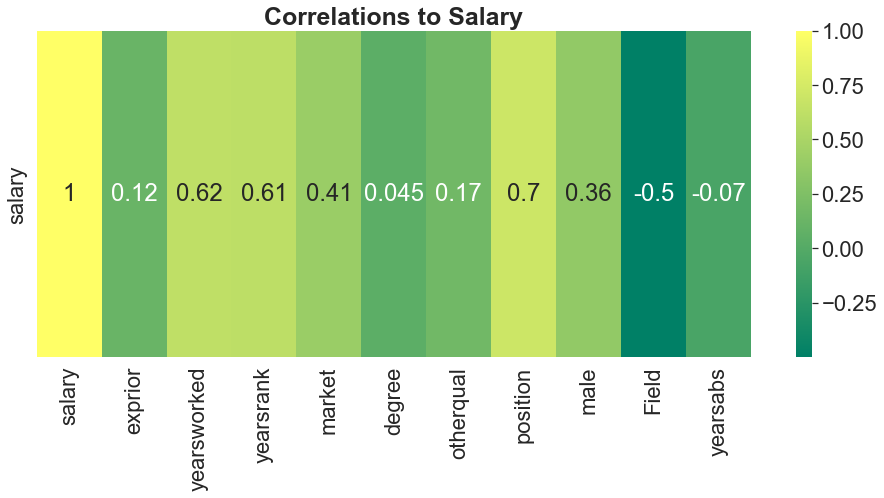

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(salary.corr().loc[['salary']], cmap="summer", annot=True)
plt.title('Correlations to Salary',size=25)

- position, yearsrank and field have a higher correlation (0.5 and greater) to salary compared to other characteristics, these three characteristics are capable of influencing employees' salaries.

## Conclusion

We were  able to perform Simple linear regression successfully, paying attention to key concepts such as overfitting and underfitting, cross-validation and Root Mean Square Error. This model works well looking at the computed RMSE's.